# Plot models from P1D archive in LaCE 

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
# new archive object from LaCE
from lace.archive import interface_archive

### Access to P1D archive stored in the LaCE repository

In [2]:
training_set='Pedersen21'
#training_set='Cabayol23'
archive=interface_archive.Archive()
archive.get_training_data(training_set=training_set)

### Inspect simulation suite

In [3]:
# cube data has information about the Latin Hypercube, and the simulation parameters varied
print('{} (pairs of) simulations in the archive'.format(archive.cube_data['nsamples']))

30 (pairs of) simulations in the archive


In [4]:
# each simulation has multiple snapshots, and each snapshot might have multiple post-processings
# (this also includes multiple axes and phases from a given simulation)
print('{} entries in the archive'.format(len(archive.data)))

1980 entries in the archive


In [5]:
# now we decide how to combine phases and axes to provide the training set to be used in the emulator
print('{} entries in the archive'.format(len(archive.training_data)))

330 entries in the archive


In [6]:
# print emulator parameters for one of the entries
archive.print_entry(5)

entry = 5, z = 4.5000, Delta2_p = 0.1848, n_p = -2.3317, alpha_p = -0.2150, f_p = 0.9920, mF = 0.2174, sigT_Mpc = 0.1005, gamma = 1.2132, kF_Mpc = 14.2177


### Linear density power spectra in the archive

This suite of simulations did not vary cosmology, so all values of the effective slope ($n_p$) are the same. 

However, different redshifts have different values of the linear amplidue ($\Delta_p^2$).

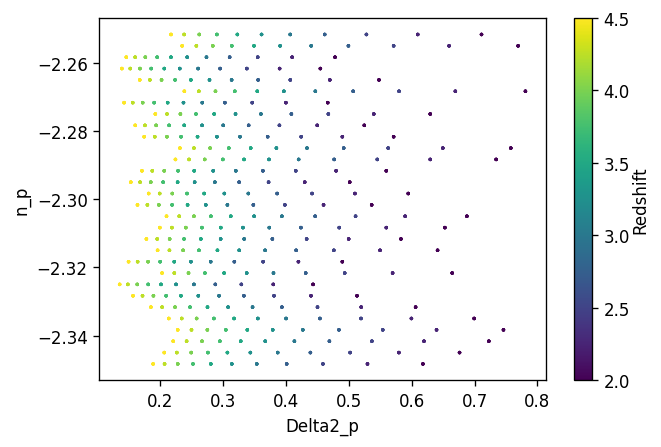

In [7]:
archive.plot_samples('Delta2_p','n_p')

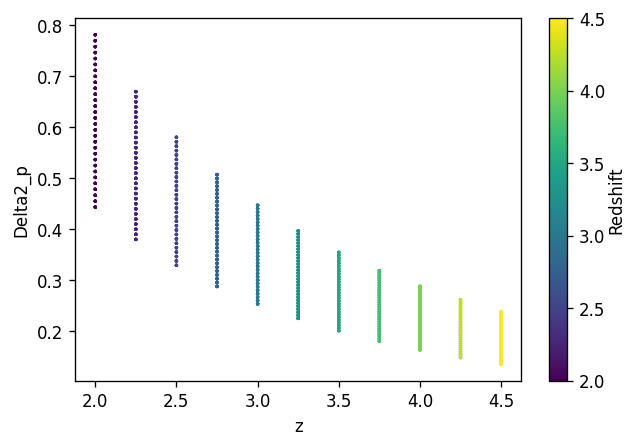

In [8]:
archive.plot_samples('z','Delta2_p')

### IGM parameters in the archive

The thermal/ionization history are different in different simulations, so we have more points for those parameters

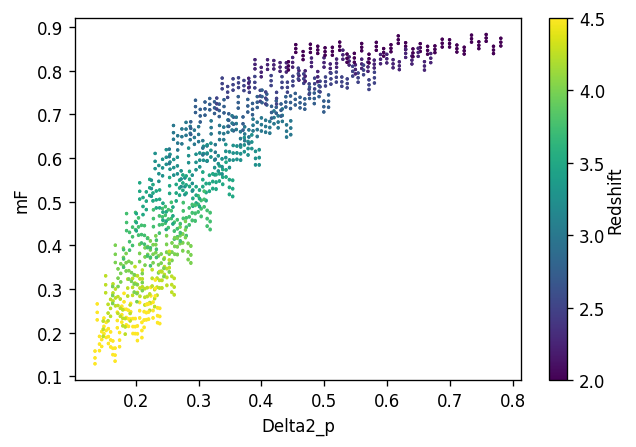

In [9]:
# mean transmitted flux fraction vs linear power amplitude
archive.plot_samples('Delta2_p','mF',tau_scalings=True)

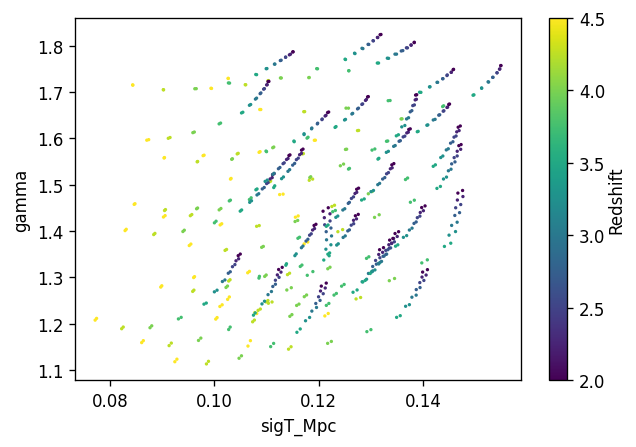

In [10]:
# thermal broadening (in Mpc) vs slope of temperature-density relation
archive.plot_samples('sigT_Mpc','gamma',tau_scalings=False,temp_scalings=False)

In [11]:
plot_ylog=True
def plot_p1d_dependence(data,tag):
    N=len(data)
    print('N =',N)
    val=np.array([data[i][tag] for i in range(N)])
    imin=np.argmin(val)
    imax=np.argmax(val)
    min_val=val[imin]
    max_val=val[imax]
    for i in range(N):
        k_Mpc=data[i]['k_Mpc']
        p1d_Mpc=data[i]['p1d_Mpc']
        col = plt.cm.jet((val[i]-min_val)/(max_val-min_val))
        if i in [imin,imax]:
            label=tag+' = %f'%val[i]
        else:
            label=None
        if plot_ylog:
            plt.loglog(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label,alpha=0.2)            
        else:
            plt.semilogx(k_Mpc,k_Mpc*p1d_Mpc,color=col,label=label,alpha=0.2)
    plt.xlabel(r'$k_\parallel$ [1/Mpc]')
    plt.ylabel(r'$k_\parallel \quad P_{\delta}(k_\parallel)$')
    plt.legend()
    plt.title(r'$P_{\rm 1D}(k)$ as a function of '+tag)

N = 330


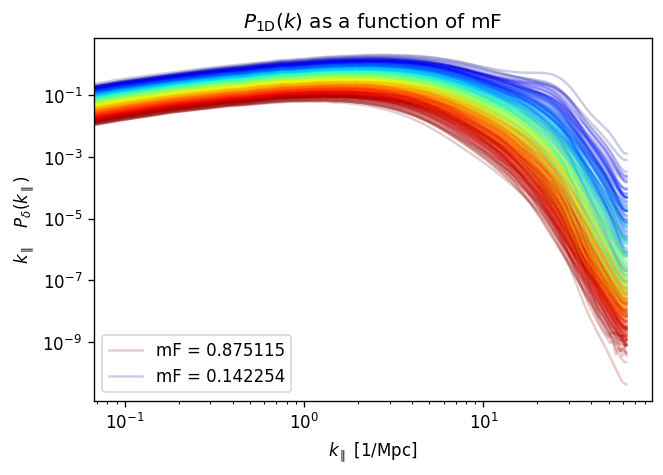

In [12]:
plot_p1d_dependence(archive.training_data,'mF')